In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Load the weekly.csv dataset.
file_path = '../Resources/weekly_sales.csv'
sales_df = pd.read_csv(file_path)
sales_df.columns = sales_df.columns.str.replace(' ','_')
sales_df.columns

Index(['Item', 'Item_Code', 'Quantity', 'Unit_Price', 'Total_Sales_Amount',
       'date'],
      dtype='object')

In [3]:
sales_df

,Item,Item_Code,Quantity,Unit_Price,Total_Sales_Amount,date
0,RAIL Vodka,3339,46.0,4.826087,222.0,2019-02-15
1,PINT LKFT IPA,3136,44.0,3.579545,157.5,2019-02-15
2,SHOT Tullamore Dew,3327,38.0,4.000000,152.0,2019-02-15
3,PINT Spotted Cow,3140,36.0,3.750000,135.0,2019-02-15
4,PINT Miller High Life,3137,30.0,3.000000,90.0,2019-02-15
...,...,...,...,...,...,...
15580,SHOT Jack Daniels,3527,1.0,4.000000,4.0,2021-09-17
15581,DBL Hendricks Gin,3485,1.0,9.000000,9.0,2021-09-17
15582,SHOT Jose Cuervo,3475,1.0,3.000000,3.0,2021-09-17
15583,SHOT Skyy Raspb,3669,1.0,3.000000,3.0,2021-09-17


In [4]:
liquor_total_weekly_sales = sales_df.groupby(['date']).sum(['Quantity', 'Total_Sales_Amount'])
liquor_total_weekly_sales.drop(['Item_Code', 'Unit_Price'], inplace=True, axis=1)
liquor_total_weekly_sales.head()

,Quantity,Total_Sales_Amount
date,,
2019-02-15,569.0,2455.25
2019-02-22,1277.0,5790.00
2019-03-01,1541.0,6587.25
2019-03-08,1496.0,6543.50
2019-03-15,1551.0,6834.75


In [5]:
plt.scatter(liquor_total_weekly_sales.date,liquor_total_weekly_sales.Total_Sales_Amount)
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'date'

In [6]:
liquor_total_weekly_sales.iloc[:,0]

date
2019-02-15     569.0
2019-02-22    1277.0
2019-03-01    1541.0
2019-03-08    1496.0
2019-03-15    1551.0
               ...  
2021-08-20    1872.0
2021-08-27    1543.0
2021-09-03    1626.0
2021-09-10    1741.0
2021-09-17    1543.0
Name: Quantity, Length: 127, dtype: float64

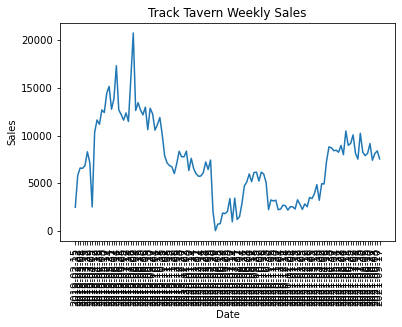

In [7]:
plt.plot(liquor_total_weekly_sales.index, liquor_total_weekly_sales['Total_Sales_Amount'])

# Create labels for the X and Y axis
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title('Track Tavern Weekly Sales')
plt.xticks(rotation=90)

# Save and display the chart
#plt.savefig("")
plt.show()

In [10]:
import datetime
liquor_total_weekly_sales['date'] = pd.to_datetime(sales_df.date, format="%Y-%M-%d")
liquor_total_weekly_sales['date'] = liquor_total_weekly_sales['date'].map(datetime.datetime.toordinal)

In [13]:
X = liquor_total_weekly_sales.date.values.reshape(-1, 1)

In [11]:
X = liquor_total_weekly_sales.date
X[:5]

date
2019-02-15    1
2019-02-22    1
2019-03-01    1
2019-03-08    1
2019-03-15    1
Name: date, dtype: int64

(127,)


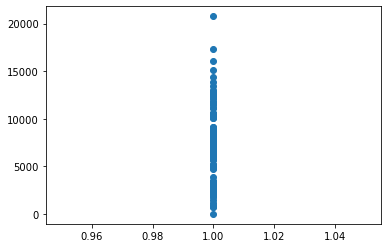

In [14]:
y =liquor_total_weekly_sales.Total_Sales_Amount
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(y_pred.shape)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()